# 🎥 YouTube Trending Data Visualization (India)

In this notebook, we’ll visualize key insights from the YouTube Trending dataset after loading it into SQLite.

We will explore:
1. Top 10 Most Viewed Videos  
2. Average Likes per Category  
3. Views vs Likes Correlation  
4. Top 10 Categories by Like-to-View Ratio

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../database/youtube.db')
print("✅ Database connection successful!")


✅ Database connection successful!


## 1️⃣ Top 10 Most Viewed YouTube Videos
We’ll fetch the top 10 most-viewed trending videos in India and visualize them.

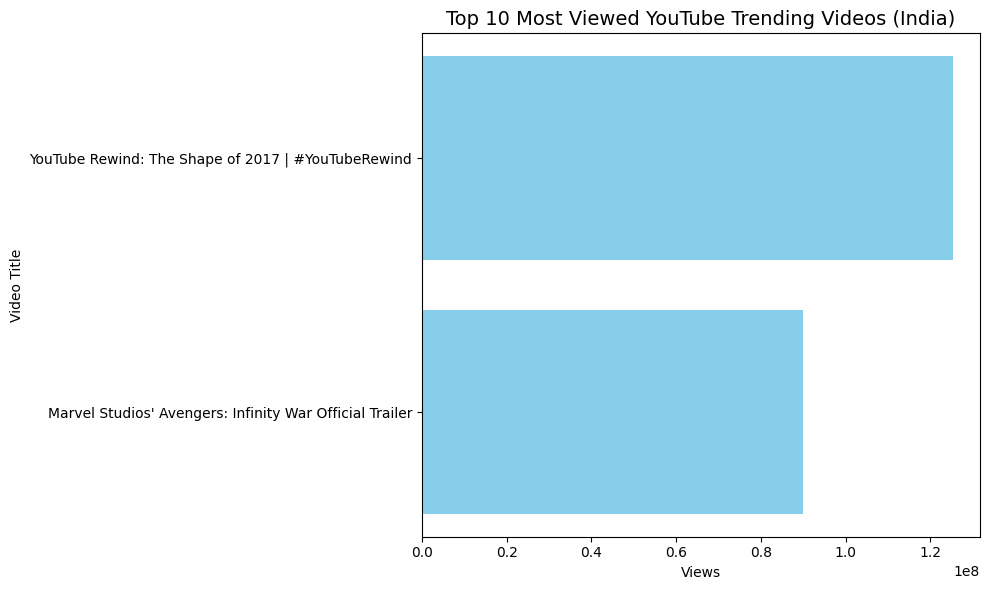

In [12]:
query1 = """
SELECT title, views FROM youtube_trending
ORDER BY views DESC LIMIT 10;
"""
top_videos = pd.read_sql(query1, conn)

plt.figure(figsize=(10,6))
plt.barh(top_videos['title'], top_videos['views'], color='skyblue')
plt.title('Top 10 Most Viewed YouTube Trending Videos (India)', fontsize=14)
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


## 2️⃣ Average Likes per Category
We’ll group videos by category to find which types of videos get the most likes on average.


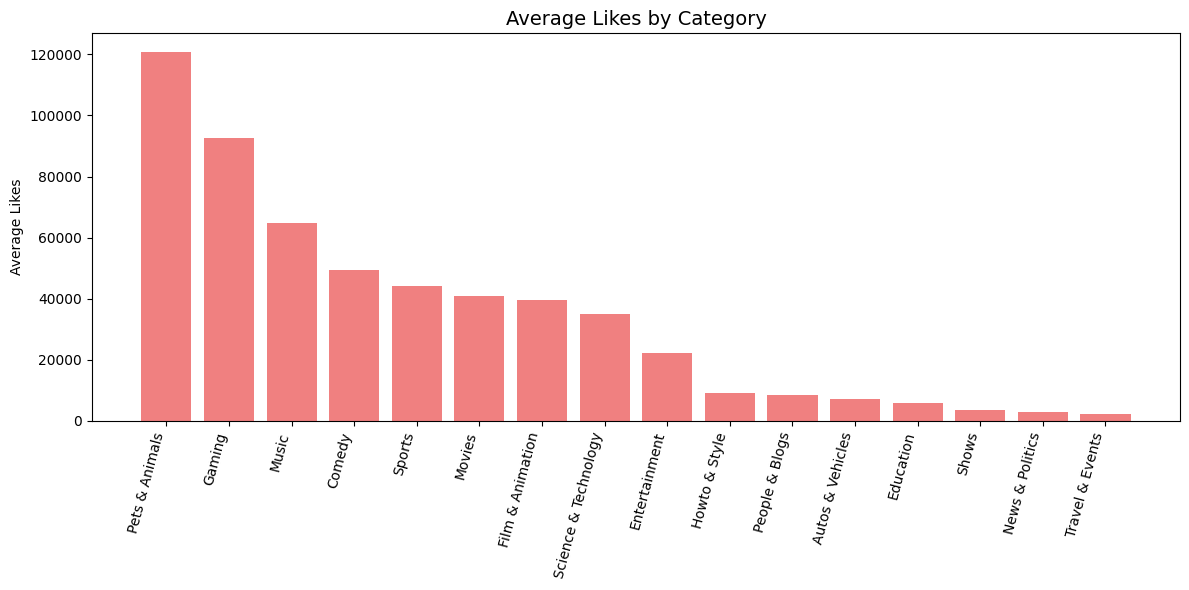

In [3]:
query2 = """
SELECT category_name, AVG(likes) as avg_likes
FROM youtube_trending
GROUP BY category_name
ORDER BY avg_likes DESC;
"""
likes_cat = pd.read_sql(query2, conn)

# Remove missing labels
likes_cat = likes_cat.dropna(subset=['category_name'])
likes_cat['category_name'] = likes_cat['category_name'].astype(str)

plt.figure(figsize=(12,6))
plt.bar(likes_cat['category_name'], likes_cat['avg_likes'], color='lightcoral')
plt.title('Average Likes by Category', fontsize=14)
plt.xticks(rotation=75, ha='right')
plt.ylabel('Average Likes')
plt.tight_layout()
plt.show()


## 3️⃣ Correlation Between Views and Likes
Let’s visualize whether there is a positive correlation between views and likes.


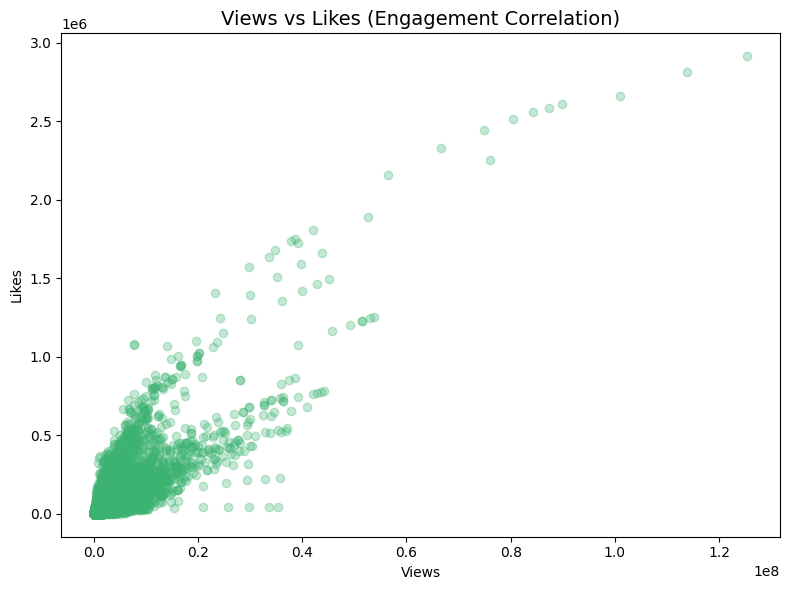

In [4]:
query3 = "SELECT views, likes FROM youtube_trending;"
df_corr = pd.read_sql(query3, conn)

plt.figure(figsize=(8,6))
plt.scatter(df_corr['views'], df_corr['likes'], alpha=0.3, color='mediumseagreen')
plt.title('Views vs Likes (Engagement Correlation)', fontsize=14)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()


## 4️⃣ Top 10 Categories by Like-to-View Ratio
Finally, let’s identify which categories get the highest engagement (likes per view).

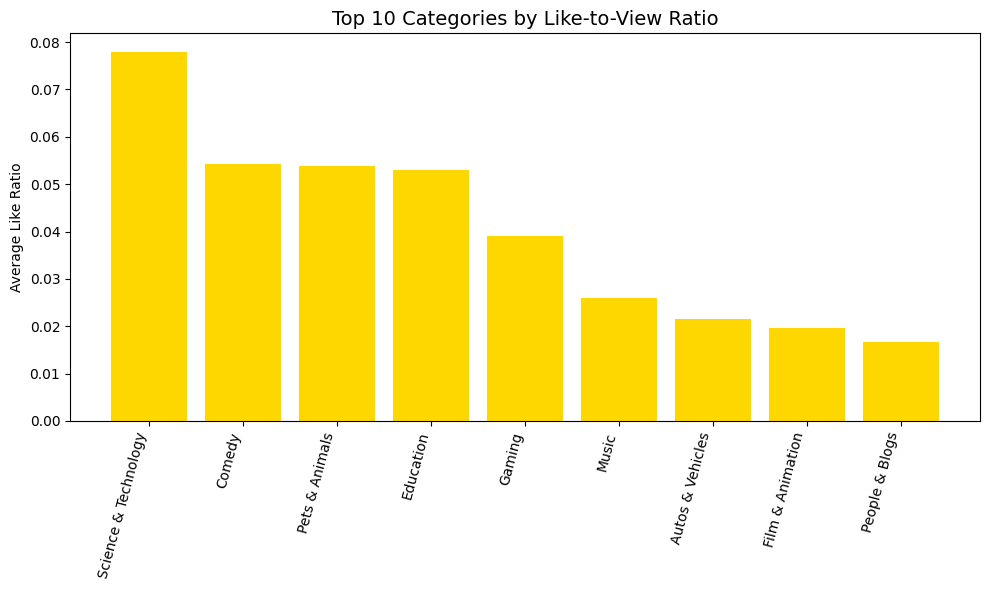

In [5]:
query4 = """
SELECT category_name, AVG(likes * 1.0 / views) AS avg_like_ratio
FROM youtube_trending
WHERE views > 0
GROUP BY category_name
ORDER BY avg_like_ratio DESC
LIMIT 10;
"""
like_ratio = pd.read_sql(query4, conn)

# Clean missing labels
like_ratio = like_ratio.dropna(subset=['category_name'])
like_ratio['category_name'] = like_ratio['category_name'].astype(str)

plt.figure(figsize=(10,6))
plt.bar(like_ratio['category_name'], like_ratio['avg_like_ratio'], color='gold')
plt.title('Top 10 Categories by Like-to-View Ratio', fontsize=14)
plt.xticks(rotation=75, ha='right')
plt.ylabel('Average Like Ratio')
plt.tight_layout()
plt.show()

## ✅ Close Database Connection
Always good practice to close your connection after running all queries.


In [6]:
conn.close()
print("🔒 Database connection closed.")

🔒 Database connection closed.
